# <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW8. Graphs

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def create_matrix(size):
    return [[0 for col in range(size)] for row in range(size)]


def adjacent_vertices(vertex, graph):
    return [vertex for vertex, is_connected in enumerate(graph[vertex]) if is_connected]


def undirected_graph_matrix(vertices, edges):
    graph = create_matrix(len(vertices))
    for edge in edges:
        start, end = edge
        graph[start][end] = True
        graph[end][start] = True
    return graph


def create_adjacency_matrix(outgoing_edges, vertices, fill_main_diagonal=False):
    graph = create_matrix(len(vertices))
    for start, end_list in outgoing_edges.items():
        start = vertices[start]
        for end in end_list:
            end = vertices[end]
            graph[start][end] = True
    if fill_main_diagonal:
        for i in range(len(vertices)):
            graph[i][i] = True
    return graph


def print_result(moves_list, goal, show_steps=True):
    def print_board(B):
        for row in B:
            print(*row)
        print()

    print("moves:", moves_list)
    print("goal: ", goal)
    print()
    print("Starting board")
    new_board = example_board
    print_board(new_board)
    for d in moves_list:
        new_board = move(new_board, d)
        if show_steps:
            print(f"---{d}---")
            print_board(new_board)
    print("Final board")
    print_board(new_board)

In [3]:
def ex1(file, nodes, xlim=False, yticks=False):
    edges = 0
    degrees = {i: 0 for i in range(nodes)}

    graph = create_matrix(nodes)
    with open(file, 'r') as f:
        while True:
            line = f.readline()
            if not line:
                break
            line = line.split(" ")
            start = int(line[0])
            end = int(line[1])

            graph[start][end] = 1
            graph[end][start] = 1

    for row in range(nodes):
        for col in range(row, nodes):
            edges += graph[row][col]

    for vertex, row in enumerate(graph):
        degrees[vertex] = sum(row)

    plt.figure(figsize=(10, 10))
    plt.hist(np.hstack(list(degrees.values())), bins='auto')
    if xlim: plt.xlim(0, xlim)
    if yticks: plt.yticks(yticks)
    plt.title(f"Distribution of node degrees \n \n nodes {nodes:_}, edges {edges:_}\n", fontsize=16)
    plt.xlabel('Degree (number of connections)', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid()
    plt.show()

In [4]:
def ex2(start=0, show_transitions=False):
    vertices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                28, 29, 30, 31, 32, 33]
    edge_list = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [0, 12], [0, 13],
                 [0, 17], [0, 19], [0, 21], [0, 31], [1, 2], [1, 3], [1, 7], [1, 13], [1, 17], [1, 19], [1, 21],
                 [1, 30], [2, 3], [2, 7], [2, 8], [2, 9], [2, 13], [2, 27], [2, 28], [2, 32], [3, 7], [3, 12], [3, 13],
                 [4, 6], [4, 10], [5, 6], [5, 10], [5, 16], [6, 16], [8, 30], [8, 32], [8, 33], [9, 33], [13, 33],
                 [14, 32], [14, 33], [15, 32], [15, 33], [18, 32], [18, 33], [19, 33], [20, 32], [20, 33], [22, 32],
                 [22, 33], [23, 25], [23, 27], [23, 29], [23, 32], [23, 33], [24, 25], [24, 27], [24, 31], [25, 31],
                 [26, 29], [26, 33], [27, 33], [28, 31], [28, 33], [29, 32], [29, 33], [30, 32], [30, 33], [31, 32],
                 [31, 33], [32, 33]]

    graph = undirected_graph_matrix(vertices, edge_list)

    # EX2 implementations ####### START #################################################
    def BFS(start):
        visited = [False] * len(vertices)
        queue = [start]
        visited[start] = True

        print("BFS traversal order:")
        while queue:
            vertex = queue.pop(0)
            print(vertex, end=", ")
            # add new vertices to queue prioritizing smallest
            for adjacent_vertex in sorted(adjacent_vertices(vertex, graph)):
                if not visited[adjacent_vertex]:
                    visited[adjacent_vertex] = True
                    queue.append(adjacent_vertex)
        print()

    def DFS(start):
        visited = [False] * len(vertices)
        stack = [start]

        print("DFS traversal order:")
        while stack:
            vertex = stack.pop(-1)
            if visited[vertex]:
                continue

            print(vertex, end=", ")
            visited[vertex] = True
            # smallest vertex will be on top of stack
            for adjacent_vertex in sorted(adjacent_vertices(vertex, graph), reverse=True):
                if not visited[adjacent_vertex]:
                    stack.append(adjacent_vertex)
        print()

    # EX2 implementations ####### END #################################################

    # optional
    def BFS_transitions(start):
        visited = [False] * len(vertices)
        queue = [start]
        transition_queue = [(0,)]
        visited[start] = True

        print("BFS directed edges:")
        while queue:
            vertex = queue.pop(0)
            transition = transition_queue.pop(0)
            print(transition, end=", ")
            for adjacent_vertex in adjacent_vertices(vertex, graph):
                if not visited[adjacent_vertex]:
                    visited[adjacent_vertex] = True
                    transition_queue.append((vertex, adjacent_vertex))
                    queue.append(adjacent_vertex)
        print()

    # optional
    def DFS_transitions(start):
        visited = [False] * len(vertices)
        stack = [start]
        transitions_stack = [(start,)]

        print("DFS directed edges:")
        while stack:
            vertex = stack.pop(-1)
            transition = transitions_stack.pop(-1)
            if visited[vertex]:
                continue

            print(transition, end=", ")
            visited[vertex] = True
            for adjacent_vertex in sorted(adjacent_vertices(vertex, graph), reverse=True):
                stack.append(adjacent_vertex)
                transitions_stack.append((vertex, adjacent_vertex))
        print()

    if show_transitions:
        BFS_transitions(start)
        print()
        DFS_transitions(start)
    else:
        BFS(start)
        print()
        DFS(start)


ex2(start=0, show_transitions=True)

BFS directed edges:
(0,), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26), 

DFS directed edges:
(0,), (0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11), 


In [5]:
def ex3(show):
    vertices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}
    vertices_ = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K'}
    outgoing_edges = {'A': ['B', 'F'], 'B': [], 'C': ['B', 'E', 'G'], 'D': ['C'], 'E': ['H', 'K'], 'F': ['E'],
                      'G': ['E', 'J'], 'H': ['F'], 'I': ['G'], 'J': ['I'], 'K': ['E']}
    original_adjacency_graph = create_adjacency_matrix(outgoing_edges, vertices)

    def print_matrix(matrix):
        print(" ", *[f"  {vertex} " for vertex in vertices])
        for i, row in enumerate(matrix):
            print(vertices_[i], [vertices_[vertex] if val else '-' for vertex, val in enumerate(row)])

    # EX3 implementations ####### START #################################################
    def BFS_approach():
        # find vertices X distance away from a vertex
        def BFS_at_distance(start, distance):
            queue = [start]
            depth = 0
            while queue and depth < distance:
                depth += 1
                next_depth = set()

                for vertex in queue:
                    for adjacent_vertex in adjacent_vertices(vertex, original_adjacency_graph):
                        next_depth.add(adjacent_vertex)
                queue = next_depth
            return list(queue)

        # apply BFS to every vertex
        hop3_adjacency_graph = create_matrix(len(vertices))
        for vertex, row in enumerate(hop3_adjacency_graph):
            for connection in BFS_at_distance(start=vertex, distance=3):
                row[connection] = True

        return hop3_adjacency_graph

    def multiplication_approach():
        numpy_matrix = np.array([np.array(row) for row in original_adjacency_graph])
        numpy_3hop = numpy_matrix @ numpy_matrix @ numpy_matrix
        numpy_3hop = [list(row) for row in numpy_3hop]
        return numpy_3hop

    # EX3 implementations ####### END #################################################

    if show == "original":
        print("Original graph adjacency matrix")
        print()
        print_matrix(original_adjacency_graph)
    if show == "3-hop BFS":
        print("3-hop graph adjacency matrix - using BFS")
        print()
        print_matrix(BFS_approach())
    # optional
    if show == "3-hop matrix multiplication":
        print("3-hop Adjacency Graph - using matrix multiplication")
        print()
        print_matrix(multiplication_approach())

    if show == "3-hop edges":
        print("3-hop graph directed edges")
        print()
        for start, row in enumerate(BFS_approach()):
            for end, col in enumerate(row):
                if col:
                    print((vertices_[start], vertices_[end]), end=", ")


ex3("3-hop edges")

3-hop graph directed edges

('A', 'H'), ('A', 'K'), ('C', 'E'), ('C', 'F'), ('C', 'H'), ('C', 'I'), ('C', 'K'), ('D', 'E'), ('D', 'H'), ('D', 'J'), ('D', 'K'), ('E', 'E'), ('E', 'H'), ('E', 'K'), ('F', 'E'), ('F', 'F'), ('G', 'E'), ('G', 'F'), ('G', 'G'), ('H', 'H'), ('H', 'K'), ('I', 'H'), ('I', 'I'), ('I', 'K'), ('J', 'E'), ('J', 'J'), ('K', 'E'), ('K', 'F'), 

In [6]:
def ex4(algorithm):
    vertices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}
    vertices_ = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K'}
    outgoing_edges = {'A': ['B', 'F'], 'B': [], 'C': ['B', 'E', 'G'], 'D': ['C'], 'E': ['H', 'K'], 'F': ['E'],
                      'G': ['E', 'J'], 'H': ['F'], 'I': ['G'], 'J': ['I'], 'K': ['E']}

    def print_matrix(matrix):
        INF = float('inf')
        print(" ", *[f"  {vertex} " for vertex in vertices])
        for i, row in enumerate(matrix):
            print(vertices_[i], [vertices_[vertex] if 0 < val < INF else '-' for vertex, val in enumerate(row)])
        print()

    # EX4 ####### START #################################################
    def ggg_transitive_closure(G):
        n = len(G)
        graph = [[col for col in row] for row in G]

        for i in range(n):
            for s in range(n):
                for t in range(n):
                    if graph[s][i] and graph[i][t]:
                        graph[s][t] = True
        return graph

    def warshall(G):
        n = len(G)
        graph = [[col for col in row] for row in G]

        for i in range(n):
            for s in range(n):
                if graph[s][i]:
                    for t in range(n):
                        if graph[i][t]:
                            graph[s][t] = True
        return graph

    def matrix_multiplication_transitive_closure(G):
        n = len(G)
        numpy_matrix = np.array([np.array(row) for row in adjacency_graph])

        graph = numpy_matrix
        # n - 1 steps guarantees that every vertex should reach every other vertex
        for i in range(n - 1):
            graph = graph @ numpy_matrix
        graph = [list(row) for row in graph]
        return graph

    def floyd_warshall(G):
        INF = float('inf')
        n = len(G)
        graph = [[INF if val == 0 else val for val in row] for row in G]

        for k in range(n):
            for i in range(n):
                for j in range(n):
                    graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])
        return graph

    # EX4 ####### END #################################################

    adjacency_graph = create_adjacency_matrix(outgoing_edges, vertices, fill_main_diagonal=True)
    if algorithm == "Warshall":
        print("Warshall algorithm")
        print()
        print_matrix(warshall(adjacency_graph))
    if algorithm == "G*G*G":
        print("Transitive closure G*G*G*...")
        print()
        print_matrix(ggg_transitive_closure(adjacency_graph))
    if algorithm == "Matrix multiplication":
        print("Matrix Multiplication approach")
        print()
        print_matrix(matrix_multiplication_transitive_closure(adjacency_graph))
    if algorithm == "Floyd Warshall":
        adjacency_graph = create_adjacency_matrix(outgoing_edges, vertices)
        print("Floyd Warshall algorithm")
        print()
        print_matrix(floyd_warshall(adjacency_graph))

In [7]:
def ex5(steps, scenario):
    vertices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}
    vertices_ = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K'}
    outgoing_edges = {'A': ['B', 'F'], 'B': [], 'C': ['B', 'E', 'G'], 'D': ['C'], 'E': ['H', 'K'], 'F': ['E'],
                      'G': ['E', 'J'], 'H': ['F'], 'I': ['G'], 'J': ['I'], 'K': ['E']}
    vertices_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    count = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
    graph = create_adjacency_matrix(outgoing_edges, vertices)
    random.seed(0)

    # EX5 ####### START #################################################
    def random_vertex():
        return random.choice(vertices_list)

    # "re-appearing anywhere" from dead ends only
    def random_walk_A(steps):
        vertex = random_vertex()
        for _ in range(steps):
            count[vertex] += 1
            adjacent = adjacent_vertices(vertex, graph)
            if not adjacent:
                vertex = random_vertex()
            else:
                vertex = random.choice(adjacent)

    # Secondly, when walking, with 20% probability jump to any random vertex
    def random_walk_B(steps):
        vertex = random_vertex()
        for _ in range(steps):
            count[vertex] += 1
            if random.random() < 0.2:
                vertex = random_vertex()
            else:
                adjacent = adjacent_vertices(vertex, graph)
                if not adjacent:
                    vertex = random_vertex()
                else:
                    vertex = random.choice(adjacent)

    # EX5 ####### END #################################################

    if scenario == 'A':
        print('Jump to a random vertex from dead ends only.')
        random_walk_A(steps)
    if scenario == 'B':
        print("With 20% probability jump to any random vertex, 80% probability select random adjacent vertex")
        random_walk_B(steps)
    for index, value in count.items():
        print(f"{vertices_[index]} {value / steps * 100:.4f}%", end=", ")
    print()
    print()

# EX1

##### There are many data types that can be represented as graphs. Study online collection at <a href=https://snap.stanford.edu/data/>https://snap.stanford.edu/data/</a>. Select from there 2 graphs that are different in type and size. Consider them as undirected (if edge A->B exists, but B->A doesn't exist, then also add B->A) and characterize them by calculating:

- ##### Nr of nodes
- ##### Nr of edges
- ##### Distribution of node degrees (visualize it using a histogram)

##### What is the graph about? What can you tell about the graphs from these statistics? Are these graphs dense or sparse?

The first histogram is of a dataset consisting of 'circles' (or 'friends lists') from Facebook. There are 4039 people (nodes) but most have under 50 friends, some have up to 200 friends and few have over 250 friends. It's clear that this graph is sparse as there are few connections.

The second histogram shows communication by email between members of a large research institution over a time span of 803 days. Nodes represent people and edges email from one to another at a certain time. There were 323 334 edges in the dataset but after removing parallel edges only 16 064 remained, parallel edge means that a person had previously received an email from the other person. What remains is a graph even more sparse than the first one. Values are lower all around.

Used data:
https://snap.stanford.edu/data/ego-Facebook.html - type: Social circles: Facebook
https://snap.stanford.edu/data/email-Eu-core-temporal.html - type: email-Eu-core temporal network


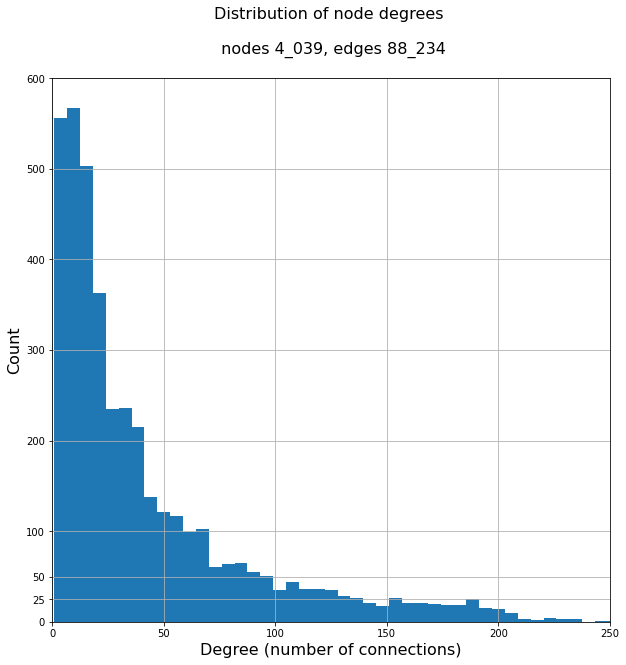

In [8]:
ex1(file='facebook_combined.txt', nodes=4039, xlim=250, yticks=[0, 25, 50, 100, 200, 300, 400, 500, 600])

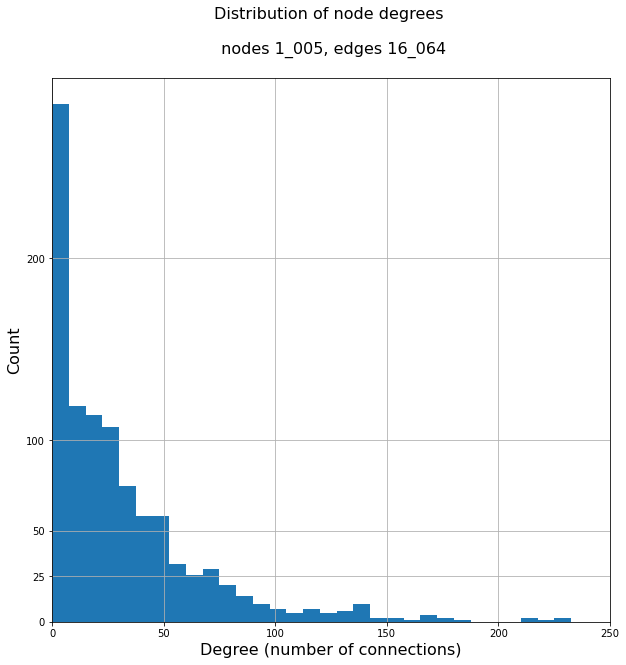

In [9]:
ex1(file='email-Eu-core-temporal.txt', nodes=1005, xlim=250, yticks=[0, 25, 50, 100, 200])

# EX2

##### Read in the following UNdirected Graph dataset from: <a href=https://courses.cs.ut.ee/MTAT.03.238/2020_fall/uploads/Main/dataset_bfsdfs.txt>dataset link</a>

##### The dataset starts with a description of vertices (below text VERTICES), which describe all graph vertices with their corresponding coordinates X and Y.

##### E.g. 0 652 396, is vertex 0 at location X=652 Y=396.

##### Lines after the line "EDGES" describe graph edges.

##### E.g. 0 1, there exists an edge between nodes 0 and 1.

##### You can visualize this graph on your own or by making use of the following web tool: <a href=https://abercus.github.io/searchvis/>Webtool searchvis</a>. Python code to generate input for visualisation can be found at <a href=https://github.com/PuuraJ/AdvancedAlgorithmics/blob/master/graph_task_visualiser.py>Graph task visualisation code</a>. Feel free to change parameters, modify the code or implement your own. Sample generated input for the web tool can be found here: <a href=https://github.com/PuuraJ/AdvancedAlgorithmics/blob/master/sample_input>link</a>:

##### Your task here is to start from vertex with id 0 and perform Breadth-First Search and Depth-First Search:

##### Start from node 0. Perform BFS and DFS and return the order of processing the nodes (the first time you start to process the node (e.g. when you add neighbours to queue/stack)). When adding neighbours, prioritize lower ID nodes first! E.g. if you have to add nodes 1 and 2 to stack/queue, add 1 first and then 2.

##### The output of this task should be two sequences (one for BFS, one for DFS) [0,1,...] . Add this to your report!

##### Now, visualize the output of your traversal by adding the order of processing to the visualisation (the one in darkred). To do that, you can either do it by hand (paint) or use the provided visualisation code and change line 152-153, where there is a variable "traversal_order". Change the sequence within the list to be the order of vertices being processed (previous output of the task, you can also use this to confirm your solution works as intended!). Also, add the visualisations of orderings to your report!

##### Hint: If you use a queue (FiLo: First in - Last out) for first traversal and a stack (LiFo: Last in - First out) for second, then the code for the two solutions should be almost the same! In order to not process nodes you've already processed, you probably need to create an additional data structure to remind you which nodes have already been processed.

I implemented BFS using a queue and DFS using a stack. Visualization is made with the provided code and using DFS/BFS result as input. At every step the adjacent vertices are sorted before being added to the queue in BFS. For DFS adjacent vertices are sorted in reverse order before being added to the stack.

In [10]:
ex2(start=0)

BFS traversal order:
0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26, 

DFS traversal order:
0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11, 


![BFS](https://i.imgur.com/ouDY5yQ.png)
![DFS](https://i.imgur.com/If0x9uQ.png)

# EX3

##### Use the following directed graph. Convert it into adjacency matrix representation and then convert the matrix into the graph where the original edges are replaced by "3-hop" edges or in other words - connect only vertices that are reachable in 3 steps of the original graph.

I converted the given graph to an adjacency matrix. Then created its 3-hop adjacency matrix using two different approaches. Firstly with BFS, finding all vertices at distance 3 from the vertex. Secondly with matrix multiplication. Both approaches achieved the same result. Visualization of the result is included as well.

In [11]:
ex3("original")

Original graph adjacency matrix

    A    B    C    D    E    F    G    H    I    J    K 
A ['-', 'B', '-', '-', '-', 'F', '-', '-', '-', '-', '-']
B ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
C ['-', 'B', '-', '-', 'E', '-', 'G', '-', '-', '-', '-']
D ['-', '-', 'C', '-', '-', '-', '-', '-', '-', '-', '-']
E ['-', '-', '-', '-', '-', '-', '-', 'H', '-', '-', 'K']
F ['-', '-', '-', '-', 'E', '-', '-', '-', '-', '-', '-']
G ['-', '-', '-', '-', 'E', '-', '-', '-', '-', 'J', '-']
H ['-', '-', '-', '-', '-', 'F', '-', '-', '-', '-', '-']
I ['-', '-', '-', '-', '-', '-', 'G', '-', '-', '-', '-']
J ['-', '-', '-', '-', '-', '-', '-', '-', 'I', '-', '-']
K ['-', '-', '-', '-', 'E', '-', '-', '-', '-', '-', '-']


In [12]:
ex3("3-hop BFS")

3-hop graph adjacency matrix - using BFS

    A    B    C    D    E    F    G    H    I    J    K 
A ['-', '-', '-', '-', '-', '-', '-', 'H', '-', '-', 'K']
B ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
C ['-', '-', '-', '-', 'E', 'F', '-', 'H', 'I', '-', 'K']
D ['-', '-', '-', '-', 'E', '-', '-', 'H', '-', 'J', 'K']
E ['-', '-', '-', '-', 'E', '-', '-', 'H', '-', '-', 'K']
F ['-', '-', '-', '-', 'E', 'F', '-', '-', '-', '-', '-']
G ['-', '-', '-', '-', 'E', 'F', 'G', '-', '-', '-', '-']
H ['-', '-', '-', '-', '-', '-', '-', 'H', '-', '-', 'K']
I ['-', '-', '-', '-', '-', '-', '-', 'H', 'I', '-', 'K']
J ['-', '-', '-', '-', 'E', '-', '-', '-', '-', 'J', '-']
K ['-', '-', '-', '-', 'E', 'F', '-', '-', '-', '-', '-']


In [13]:
ex3("3-hop matrix multiplication")

3-hop Adjacency Graph - using matrix multiplication

    A    B    C    D    E    F    G    H    I    J    K 
A ['-', '-', '-', '-', '-', '-', '-', 'H', '-', '-', 'K']
B ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
C ['-', '-', '-', '-', 'E', 'F', '-', 'H', 'I', '-', 'K']
D ['-', '-', '-', '-', 'E', '-', '-', 'H', '-', 'J', 'K']
E ['-', '-', '-', '-', 'E', '-', '-', 'H', '-', '-', 'K']
F ['-', '-', '-', '-', 'E', 'F', '-', '-', '-', '-', '-']
G ['-', '-', '-', '-', 'E', 'F', 'G', '-', '-', '-', '-']
H ['-', '-', '-', '-', '-', '-', '-', 'H', '-', '-', 'K']
I ['-', '-', '-', '-', '-', '-', '-', 'H', 'I', '-', 'K']
J ['-', '-', '-', '-', 'E', '-', '-', '-', '-', 'J', '-']
K ['-', '-', '-', '-', 'E', 'F', '-', '-', '-', '-', '-']


![Original](https://i.imgur.com/1kR0SlV.png)
![3-hop](https://i.imgur.com/5kpeYQL.png)

# EX4

##### Make a transitive closure of the same graph - using two approaches. 1) Multiplication approach: G\*G\*G\*...; 3) with Warshall algorithm. Verify that you got the same answer.


I created transitive closure of the graph from ex3 using multiplication approach G\*G\*G\*... and Warshall algorithm, both were present in lecture slides. Additionally, I did the same using matrix multiplication and Floyd-Warshall algorithm. All four gave the same result.

In [14]:
ex4("G*G*G")

Transitive closure G*G*G*...

    A    B    C    D    E    F    G    H    I    J    K 
A ['A', 'B', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
B ['-', 'B', '-', '-', '-', '-', '-', '-', '-', '-', '-']
C ['-', 'B', 'C', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
D ['-', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
E ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
F ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
G ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
H ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
I ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
J ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
K ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']



In [15]:
ex4("Warshall")

Warshall algorithm

    A    B    C    D    E    F    G    H    I    J    K 
A ['A', 'B', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
B ['-', 'B', '-', '-', '-', '-', '-', '-', '-', '-', '-']
C ['-', 'B', 'C', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
D ['-', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
E ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
F ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
G ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
H ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
I ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
J ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
K ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']



In [16]:
ex4("Matrix multiplication")

Matrix Multiplication approach

    A    B    C    D    E    F    G    H    I    J    K 
A ['A', 'B', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
B ['-', 'B', '-', '-', '-', '-', '-', '-', '-', '-', '-']
C ['-', 'B', 'C', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
D ['-', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
E ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
F ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
G ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
H ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
I ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
J ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
K ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']



In [17]:
ex4("Floyd Warshall")

Floyd Warshall algorithm

    A    B    C    D    E    F    G    H    I    J    K 
A ['-', 'B', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
B ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
C ['-', 'B', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
D ['-', 'B', 'C', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
E ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
F ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
G ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
H ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']
I ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
J ['-', '-', '-', '-', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
K ['-', '-', '-', '-', 'E', 'F', '-', 'H', '-', '-', 'K']



 # EX5

##### Implement a "random walk" procedure following links randomly (equal probabilities). Using the same graph again, estimate the probability of being in any given node by varying how you deal with "dead ends" (e.g. node B) and "nodes with no links into it" (e.g. nodes D or A). First, try "re-appearing anywhere" from dead ends only. Secondly, when walking, with 20% probability jump to any random vertex in the network, and 80% of times select randomly and go to one of the neighbouring vertices. For both scenarios, provide the respective probabilities and identify the most important nodes.

I implemented random walk without matrix multiplication by just keeping count of the times a vertex was visited.

In first scenario vertices A, B D have probability of 0 because these edges don't have any incoming edges and vertex C only has 1 incoming edge from vertex D which means it can only be visited once. Vertices F, H, E, K and G, I, J form strongly connected components, however there's an edge going from G, I, J to F, H E, K but not the other way. Therefore, random walk will end up mainly going between vertices F, H, E, K. Vertex E has higher probability because it has two incoming edges in subgraph F, H, E, K while other vertices have only one incoming edge.

In second scenario the probability distribution is much more uniform. Vertices A, B, D have low probability for the same reason as before. Similarly, vertices F, H, E, K have high probabiliy.

In [18]:
ex5(steps=10_000, scenario="A")
ex5(steps=10_000, scenario="B")

Jump to a random vertex from dead ends only.
A 0.0000%, B 0.0000%, C 0.0000%, D 0.0000%, E 39.8800%, F 20.1400%, G 0.0400%, H 20.1400%, I 0.0300%, J 0.0300%, K 19.7400%, 

With 20% probability jump to any random vertex, 80% probability select random adjacent vertex
A 2.3600%, B 4.4000%, C 4.4500%, D 2.4800%, E 27.0600%, F 13.8500%, G 8.8800%, H 13.0600%, I 6.8800%, J 5.8300%, K 10.7500%, 



# EX7

##### Tilt is a puzzle game played on a Tilt board: an n × n square grid, where grid square contains either a fixed obstacle, a movable slider, or neither (the grid square is empty). A Tilt move consists of tilting a board in any of the four cardinal directions (up, left, down or right), causing each slider to slide maximally in that direction until it hits either: the edge of the board, an obstacle, or another slider that cannot slide any further. A Tilt move results in a new Tilt board configuration. Given a Tilt board B with one grid square t labeled as the target, a sequence of k Tilt moves solves Tilt puzzle (B,t) if applying the moves in sequence to B results in a Tilt board configuration B' that contains a slider in square t. The figure below shows a small Tilt puzzle and a solution using the fewest possible moves k = 8. Obstacles are shown in black, movable sliders are circles, and the target square is shaded gray.

##### We represent an n × n board configuration B using a length-n tuple of length-n tuples, each representing a row of the configuration, where the grid square in row y (from the top) and column x (from the left) is B[y][x], equal to either character ’#’ (an obstacle), ’o’ (a slider), or ’.’ (neither). We represent the target square by a tuple t = (xt, yt) where the puzzle is solved when B[yt][xt] = ’o’. Your code template has a function move(B, d) which computes a move from board B in direction d in O(n^2) time.




##### Given a Tilt puzzle with starting n × n board B containing b fixed obstacles and s movable sliders, argue that the number of board configurations reachable from B is at most: $(n^{2} - b)!/s!(n^{2}- b - s)!$

Each of the $s$ sliders can be on any of the $n^2 -b$ empty cells, so there are $\binom{n^2 - b}{s} = \frac{(n^2 -b)!}{s!(n^2 - b - s)!}$ possible  configurations,  though  many  of  these  configurations  may  be  unreachable,  as  sliders may be blocked by obstacles from reaching some empty squares, or there may be gaps between sliders that cannot be created by tilting the puzzle.

<font color="gray" size="-2">used resources: https://ocw.mit.edu/courses/6-006-introduction-to-algorithms-spring-2020/23d4cf5421c77bb55b3735f7e8f70dfe_MIT6_006S20_ps5_solutions.pdf and https://ocw.mit.edu/courses/6-006-introduction-to-algorithms-spring-2020/resources/mit6_006s20_ps5-template/</font>

Implemented move operation here clearly takes $O(n^2)$ time as it moves all sliders. It starts looking from the opposite end and keep track of possible free positions where sliders can be moved to. The implemented algorithm manages to solve the example using the same set of moves and manages to solve test boards as well.


In [19]:
def move(B, d):
    board = [[val for val in row] for row in B]
    n = len(board)
    if d == 'up':
        for col in range(n):
            free_positions = []
            for row in range(n):
                if board[row][col] == '.':
                    free_positions.append((row, col))
                if board[row][col] == '#':
                    free_positions.clear()
                if board[row][col] == 'o' and free_positions:
                    board[row][col] = '.'
                    free_positions.append((row, col))
                    new_row, new_col = free_positions.pop(0)
                    board[new_row][new_col] = 'o'
    if d == 'down':
        for col in reversed(range(n)):
            free_positions = []
            for row in reversed(range(n)):
                if board[row][col] == '.':
                    free_positions.append((row, col))
                if board[row][col] == '#':
                    free_positions.clear()
                if board[row][col] == 'o' and free_positions:
                    board[row][col] = '.'
                    free_positions.append((row, col))
                    new_row, new_col = free_positions.pop(0)
                    board[new_row][new_col] = 'o'
    if d == 'left':
        for row in range(n):
            free_positions = []
            for col in range(n):
                if board[row][col] == '.':
                    free_positions.append((row, col))
                if board[row][col] == '#':
                    free_positions.clear()
                if board[row][col] == 'o' and free_positions:
                    board[row][col] = '.'
                    free_positions.append((row, col))
                    new_row, new_col = free_positions.pop(0)
                    board[new_row][new_col] = 'o'
    if d == 'right':
        for row in reversed(range(n)):
            free_positions = []
            for col in reversed(range(n)):
                if board[row][col] == '.':
                    free_positions.append((row, col))
                if board[row][col] == '#':
                    free_positions.clear()
                if board[row][col] == 'o' and free_positions:
                    board[row][col] = '.'
                    free_positions.append((row, col))
                    new_row, new_col = free_positions.pop(0)
                    board[new_row][new_col] = 'o'

    board = tuple(tuple(row) for row in board)
    return board


#Input:  B | Starting board configuration
#        t | Tuple t=(x,y) representing the target square
#output: M | List of moves that solves B(or None if B not solvable
def solve_tilt(B, t):
    M = []  # moves list
    xt, yt = t
    P = {B: None}
    levels = [[B]]
    while levels[-1]:
        L = []  # new level
        for B1 in levels[-1]:
            for d in ('up', 'down', 'left', 'right'):
                B2 = move(B1, d)
                if B2 not in P:
                    P[B2] = (B1, d)
                    L.append(B2)
                    if B2[yt][xt] == 'o':
                        while P[B2]:
                            B2, d = P[B2]
                            M.append(d)
                        M.reverse()
                        return M
        levels.append(L)
    return None


example_board = (
    ('o', '#', '.', '.', '.'),
    ('.', '#', '.', '.', '.'),
    ('.', '.', '.', '.', '.'),
    ('.', '.', '.', '.', '.'),
    ('o', '.', '#', '.', '.'),
)

target = (2, 2)

result = solve_tilt(example_board, target)

print_result(moves_list=result, goal=target)

moves: ['down', 'right', 'up', 'right', 'up', 'left', 'down']
goal:  (2, 2)

Starting board
o # . . .
. # . . .
. . . . .
. . . . .
o . # . .

---down---
. # . . .
. # . . .
. . . . .
o . . . .
o . # . .

---right---
. # . . .
. # . . .
. . . . .
. . . . o
. o # . .

---up---
. # . . o
. # . . .
. o . . .
. . . . .
. . # . .

---right---
. # . . o
. # . . .
. . . . o
. . . . .
. . # . .

---up---
. # . . o
. # . . o
. . . . .
. . . . .
. . # . .

---left---
. # o . .
. # o . .
. . . . .
. . . . .
. . # . .

---down---
. # . . .
. # . . .
. . o . .
. . o . .
. . # . .

Final board
. # . . .
. # . . .
. . o . .
. . o . .
. . # . .



In [20]:
tests = (
    (
        (
            (
                ('#', '#', '.', '.', '.'),
                ('.', 'o', '#', '.', '.'),
                ('.', '.', 'o', '.', '.'),
                ('.', '.', '.', '.', '.'),
                ('#', '#', '#', '.', '.'),
            ),
            (4, 3),
        ),
        ('down', 'right')
    ),
    (
        (
            (
                ('.', '.', '.', '.', '.'),
                ('.', '.', 'o', '.', 'o'),
                ('.', '.', '.', '#', '#'),
                ('.', '.', '#', '#', '.'),
                ('.', '.', '#', '.', '#'),
            ),
            (1, 3),
        ),
        ('down', 'left', 'down', 'right')
    ),
    (
        (
            (
                ('.', '.', '.', '.', '.'),
                ('.', '.', '.', '.', '.'),
                ('.', '#', '#', '.', '.'),
                ('#', '.', '.', '.', 'o'),
                ('#', '#', '.', '#', 'o'),
            ),
            (1, 0),
        ),
        ('up', 'left', 'down', 'right', 'up', 'left')
    ),
    (
        (
            (
                ('o', '#', '.', '.', '.'),
                ('.', '#', '.', '.', '.'),
                ('.', '.', '.', '.', '.'),
                ('.', '.', '.', '.', '.'),
                ('o', '.', '#', '.', '.')
            ),
            (2, 2),
        ),
        ('down', 'right', 'up', 'right', 'up', 'left', 'down')
    ),
    (
        (
            (
                ('.', '.', '.', '.', '.', '.', '#'),
                ('.', '.', '.', '.', '.', '#', '.'),
                ('.', '.', '.', '.', '.', '#', '#'),
                ('.', '.', '.', '.', '.', '#', '#'),
                ('.', 'o', 'o', 'o', '.', '.', '.'),
                ('#', '#', '#', '.', '.', '.', '.'),
                ('#', '#', '#', 'o', '.', '.', '.'),
            ),
            (3, 3),
        ),
        ('up', 'left', 'down', 'right', 'up', 'right', 'up', 'left', 'down', 'right')
    ),
)

for data, answer in tests:
    print(answer == tuple(solve_tilt(*data)))

True
True
True
True
True
